#Lab 3: Spectral Representation

The goal of this lab is to gain familiarity with the spectral representations in Python, specially the spectrograms.

In [ ]:
%load_ext autoreload
%autoreload 2

!git clone https://github.com/pzinemanas/sis1lab.git

import os
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

from sis1lab.util import load_audio, plot_signals, plot_spectrogram, plot_mean_spectrogram, plot_spectrum_at

from sis1lab.util import plot_spectrum_at

Cloning into 'sis1lab'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 59 (delta 16), reused 28 (delta 6), pack-reused 0
Unpacking objects: 100% (59/59), done.


First upload the reference signal and plot the first seconds of it.

In [ ]:
filepath = "./sis1lab/audio/reference.wav"
data, sr = load_audio(filepath)

Ts = 1/sr

t = np.linspace(0, len(data)*Ts, len(data))

plot_signals(data, sr, t_start=0, t_end=0.5)

ipd.Audio(data, rate=sr)

# **Exercises**

**1. Spectrograms**

Spectrograms are visual representations of the frequency content of a signal over time. They're created by taking short sections of the signal, calculating the frequency spectrum for each section, and then plotting the magnitude of the spectrum against both frequency and time. This generates a 2D plot where the intensity or color represents the magnitude of each frequency component present in the signal at different points in time.

The window length used in creating these sections determines the trade-off between frequency resolution and the ability to track changes in frequency over time. Longer windows provide better frequency resolution but might struggle to capture rapid changes in frequency. On the other hand, shorter windows capture changes better but might lack precision in frequency resolution.

In Python, you can use the spectrogram function from the scipy.signal package to compute a spectrogram. This function takes in parameters that define how the spectrogram is calculated, such as the window length, overlap between windows, and other settings. Typically, you'll find predefined functions like plot_spectrogram to help visualize the spectrogram generated by this process.

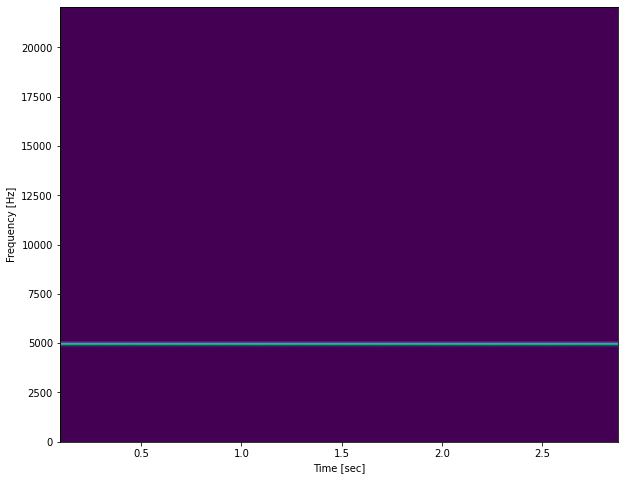

In [ ]:
from scipy import signal

#define signal
A = 0.8
f0 = 5000.0
phi = np.pi/2
fs = 44100
t = np.arange(0, 3, 1.0/fs)
x = A * np.cos(2*np.pi*f0*t + phi)

# calculate the spectrogram
window_length = 8192
ff, tt, S = signal.spectrogram(x, fs, nperseg=window_length, noverlap=window_length/2)

# plot the spectrogram

plt.figure(figsize=(10,8))
plot_spectrogram(ff, tt, S)
plt.show()

We can plot the spectrum of the signal at an specific time using the `plot_spectrum_at` function. For instance, we can see the spectrum of the signal at the 0.5 seconds:

In [ ]:
plot_spectrum_at(ff, tt, S, 0.5)

1.1. Calculate and plot the spectrogram of your reference signal. Use `plt.ylim` to select the limits of the y axis in order to zoom in the region of interest. For instance if you want to see the region between 0 and 4000 Hz, you can call `plt.ylim([0, 4000])` after the `plot_spectrogram` function.


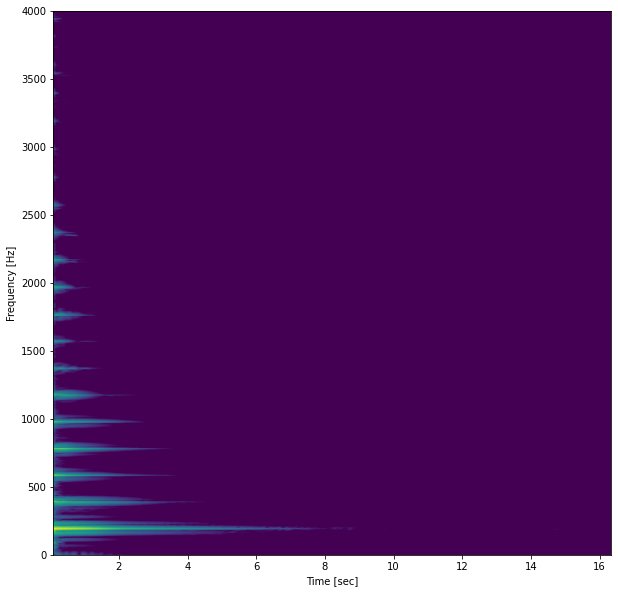

In [ ]:
window_length = 8192
ff, tt, S = signal.spectrogram(data, fs, nperseg=window_length, noverlap=window_length/2)

# plot the spectrogram

plt.figure(figsize=(10,10))
plot_spectrogram(ff, tt, S)
plt.ylim([0, 4000])
plt.show()

1.2. Select a time where almost all harmonics are present and plot the spectrum at that time.

In [ ]:
plot_spectrum_at(ff, tt, S, 0.5)

1.3. Use the cursor for measuring the weights of the fundamental frequency and some harmonics (6-10)

In [ ]:
weights = [1, 0.16, 0.093, 0.15, 0.05, 0.06, 0.013, 0.009, 0.02, 0.02, 0.011, 0.0054, 0.0026]

**2. Synthesis**:

Let's define a function to synthetize an harmonic singal which receives the fundamental frequency ($f_0$) and the weights ($A_k$) of each harmonic and the time vector ($t$). This is similar to what you do in Lab 3- Ex3.2.


In [ ]:
def synthetize(f0, phi, Ak, t):

    """
    Synthesizes a signal based on given parameters.

    Parameters:
    - frequency (float): Fundamental frequency of the signal.
    - phase_offset (float): Phase offset for the signal.
    - amplitudes (array-like): List or array of amplitudes for each harmonic.
    - time_values (array-like): Array of time values for the signal.

    Returns:
    - y (array-like): Synthesized signal based on the provided parameters.
    """

  y = 0
  for k in range(1, len(Ak) + 1):
    y += Ak[k-1] * np.cos(2*np.pi*k*f0*t + k*phi - (k-1)*np.pi/2)
  return y

2.1. Use the `synthetize` function to generate a synthesis with the weights ($A_k$) found in 1.3 and the fundamental frequency and phases found in previous labs. Plot both the reference and the synthetize signal. Listen to the synthetize signal.

In [ ]:
import numpy as np

f0 = 198

delta_t = 0.0458
phi = 2*np.pi*f0*delta_t % (2*np.pi)

t = np.linspace(0, len(data)/fs, len(data))
print(t)

y = synthetize(f0, phi, weights, t)
y = np.amax(data)*y/np.amax(y)

plot_signals([data, y], sr, t_start=0, t_end=0.2, name=['original', 'synthetized'])

ipd.Audio(y, rate=sr)

[0.00000000e+00 2.26757681e-05 4.53515363e-05 ... 1.64887755e+01
 1.64887982e+01 1.64888209e+01]


2.2. Calculate the spectrogram of the syntethesied singal `S_synt`; and comparte the spectrums of both signals at the same time using `plot_spectrum_at(ff, tt, [S_ref, S_synt], time)`, where `S_ref`is spectrogram of the reference signal.

**Note:** use the same window length to calculate both spectrograms.

In [ ]:
ff, tt, Sy = signal.spectrogram(y, fs, nperseg=window_length, noverlap=window_length/2)
plot_spectrum_at(ff, tt, [S, Sy], 0.5)

2.3. Compare the spectrograms of the two signals. What are the main differences?

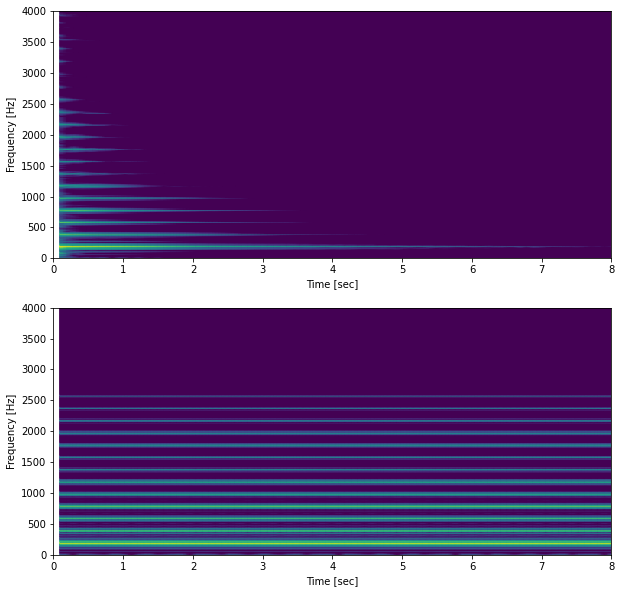

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plot_spectrogram(ff, tt, S)
plt.xlim([0,8])
plt.ylim([0,4000])

plt.subplot(2,1,2)
plot_spectrogram(ff, tt, Sy)
plt.xlim([0,8])
plt.ylim([0,4000])
plt.show()

The original sound, being a natural and complex signal, might have a richer frequency content, which could explain the higher number of lines in its spectrogram. On the other hand, the synthesized sound might be simpler or purer in its frequency content, leading to fewer lines in its spectrogram. The color difference could be due to the different amplitudes or intensities of the sounds.